In [1]:
import MDAnalysis as mda

In [7]:
u = mda.Universe(*[f"dmso_opt_c1_o{i}.xyz" for i in [1, 1, 2, 3, 4]])

In [9]:
rdmol = u.atoms.convert_to("RDKIT")

In [12]:
rdmol.GetNumBonds()

9

In [24]:

def add_conformer_from_coordinates(rdmol, coordinates):
    """Add conformer to RDKit from coordinate array

    Parameters
    ----------
    rdmol: rdkit.Chem.Mol
        RDKit Molecule
    coordinates: numpy.ndarray of floats
        Coordinates in angstrom
    """
    from rdkit import Chem
    from rdkit import Geometry
    n_atoms = rdmol.GetNumAtoms()
    if coordinates.shape != (n_atoms, 3):
        raise ValueError("Shape of coordinates must be (n_atoms, 3)")
    conformer = Chem.Conformer(n_atoms)
    for i, xyz in enumerate(coordinates):
        x, y, z = map(float, xyz)
        conformer.SetAtomPosition(i, Geometry.Point3D(x, y, z))
    rdmol.AddConformer(conformer)


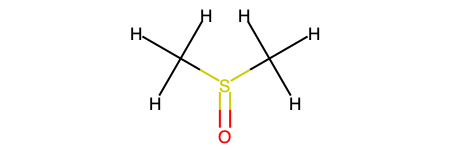

In [17]:
rdmol

In [25]:
for ts in u.trajectory:
    add_conformer_from_coordinates(rdmol, u.atoms.positions)

In [26]:
rdmol.GetNumConformers()

4

In [27]:
from rdkit import Chem

Chem.MolToTPLFile(rdmol, "dmso_orientations.tpl")

In [28]:
u.transfer_to_memory()

In [29]:
dir(u.trajectory)

['OtherWriter',
 'Writer',
 '_Timestep',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply_limits',
 '_apply_transformations',
 '_auxs',
 '_check_for_aux',
 '_format_hint',
 '_read_frame',
 '_read_frame_with_aux',
 '_read_next_timestep',
 '_reopen',
 '_sliced_iter',
 '_transformations',
 'add_auxiliary',
 'add_transformations',
 'aux_list',
 'check_slice_indices',
 'close',
 'convert_forces_from_native',
 'convert_forces_to_native',
 'convert_pos_from_native',
 'convert_pos_to_native',
 'convert_time_from_native',
 'convert_time_to_native',
 'convert_velocities_from_

In [36]:
import numpy as np
np.save("dmso_orientations.npy", u.trajectory.coordinate_array, allow_pickle=False)

In [37]:
mol2 = """default
  Generated by xyz2mol

 10  9  0  0  0  0  0  0  0  0999 V2000
   -1.4950    0.6153    0.0116 C   0  0  0  0  0
   -1.5538    1.6407    0.3562 H   0  0  0  0  0
   -1.9010   -0.0621    0.7526 H   0  0  0  0  0
   -2.0537    0.5104   -0.9089 H   0  0  0  0  0
    0.2106    0.1753   -0.3398 S   0  0  0  0  0
    0.2212   -1.2767   -0.6519 O   0  0  0  0  0
    0.8518    0.3493    1.3290 C   0  0  0  0  0
    1.8949    0.0629    1.3076 H   0  0  0  0  0
    0.7652    1.3779    1.6580 H   0  0  0  0  0
    0.3152   -0.3133    1.9966 H   0  0  0  0  0
  1  2  1  0  0  0
  1  3  1  0  0  0
  1  4  1  0  0  0
  1  5  1  0  0  0
  5  6  1  0  0  0
  5  7  1  0  0  0
  7  8  1  0  0  0
  7  9  1  0  0  0
  7 10  1  0  0  0
M  END
"""

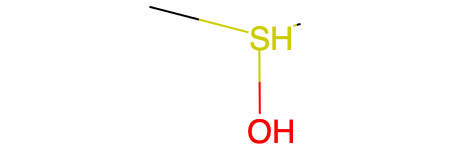

In [39]:
Chem.MolFromMolBlock(mol2)

In [43]:
u = mda.Universe("dmso_opt_c1.xyz")

In [44]:
u.atoms.write("dmso_opt_c1.pdb")

In [45]:
u.atoms.write("dmso_opt_c1.gro")

In [ ]:
u.atoms.write("dmso_c1.pdb")